# 📊 Sales Data Analysis with Pandas

## Task 5: Data Analysis on CSV Files

**Objective:** Analyze sales data using Pandas to extract meaningful insights and create visualizations.

**Tools Used:**
- Python 3.12
- Pandas (Data manipulation)
- Matplotlib (Visualization)
- Seaborn (Statistical visualization)
- NumPy (Numerical operations)

**Analysis Goals:**
1. Load and explore sales data
2. Clean and preprocess data
3. Perform statistical analysis
4. Create visualizations
5. Extract key business insights

---

## 1. Import Required Libraries

First, we'll import all necessary libraries for data analysis and visualization.

In [62]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings

# Configure visualization settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Display settings for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

print("✅ All libraries imported successfully!")
print(f"📦 Pandas version: {pd.__version__}")
print(f"📦 NumPy version: {np.__version__}")

✅ All libraries imported successfully!
📦 Pandas version: 2.3.3
📦 NumPy version: 2.3.5


## 2. Generate Sample Sales Data

Since we need sales data to analyze, we'll create a realistic sample dataset with:
- Multiple products
- Different regions
- Date range spanning several months
- Various quantities and prices

In [63]:
# Set random seed for reproducibility
np.random.seed(42)

# Define business parameters
products = ['Laptop', 'Mouse', 'Keyboard', 'Monitor', 'Headphones', 'Webcam', 'USB Drive', 'Tablet']
regions = ['North', 'South', 'East', 'West', 'Central']
categories = ['Electronics', 'Accessories', 'Electronics', 'Electronics', 'Accessories', 'Accessories', 'Accessories', 'Electronics']

# Product prices (in USD)
base_prices = {
    'Laptop': 899.99,
    'Mouse': 29.99,
    'Keyboard': 79.99,
    'Monitor': 299.99,
    'Headphones': 149.99,
    'Webcam': 89.99,
    'USB Drive': 19.99,
    'Tablet': 499.99
}

# Generate date range (6 months of data)
start_date = datetime(2025, 1, 1)
end_date = datetime(2025, 6, 30)
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# Generate sales records
num_records = 1000
sales_data = []

for _ in range(num_records):
    product = np.random.choice(products)
    region = np.random.choice(regions)
    date = np.random.choice(date_range)
    quantity = np.random.randint(1, 20)
    
    # Add some price variation (+/- 10%)
    base_price = base_prices[product]
    price = base_price * np.random.uniform(0.9, 1.1)
    
    # Calculate revenue
    revenue = quantity * price
    
    # Get category
    category = categories[products.index(product)]
    
    sales_data.append({
        'Date': date,
        'Product': product,
        'Category': category,
        'Region': region,
        'Quantity': quantity,
        'Unit_Price': round(price, 2),
        'Revenue': round(revenue, 2)
    })

# Create DataFrame
df = pd.DataFrame(sales_data)

# Sort by date
df = df.sort_values('Date').reset_index(drop=True)

# Save to CSV
csv_path = 'sales_data.csv'
df.to_csv(csv_path, index=False)

print(f"✅ Generated {len(df)} sales records")
print(f"📁 Saved to: {csv_path}")
print(f"📅 Date range: {df['Date'].min().strftime('%Y-%m-%d')} to {df['Date'].max().strftime('%Y-%m-%d')}")

✅ Generated 1000 sales records
📁 Saved to: sales_data.csv
📅 Date range: 2025-01-01 to 2025-06-30


## 3. Load and Explore Data

Now we'll load the CSV file and perform initial data exploration to understand its structure and contents.

In [64]:
# Load the CSV file
df = pd.read_csv('sales_data.csv', parse_dates=['Date'])

print("="*60)
print("📊 SALES DATA OVERVIEW")
print("="*60)
print(f"\n📏 Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns\n")

# Display first few records
print("🔍 First 5 Records:")
print("-"*60)
df.head()

📊 SALES DATA OVERVIEW

📏 Dataset Shape: 1000 rows × 7 columns

🔍 First 5 Records:
------------------------------------------------------------


,Date,Product,Category,Region,Quantity,Unit_Price,Revenue
0,2025-01-01,Keyboard,Electronics,East,6,75.67,454.02
1,2025-01-01,Headphones,Accessories,Central,8,147.65,1181.16
2,2025-01-01,Monitor,Electronics,West,8,274.35,2194.81
3,2025-01-02,Webcam,Accessories,Central,12,97.88,1174.60
4,2025-01-02,Monitor,Electronics,South,17,328.59,5586.07


In [65]:
# Display dataset information
print("\n📋 Dataset Information:")
print("-"*60)
df.info()


📋 Dataset Information:
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1000 non-null   datetime64[ns]
 1   Product     1000 non-null   object        
 2   Category    1000 non-null   object        
 3   Region      1000 non-null   object        
 4   Quantity    1000 non-null   int64         
 5   Unit_Price  1000 non-null   float64       
 6   Revenue     1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 54.8+ KB


In [66]:
# Statistical summary of numerical columns
print("\n📈 Statistical Summary:")
print("-"*60)
df.describe()


📈 Statistical Summary:
------------------------------------------------------------


,Date,Quantity,Unit_Price,Revenue
count,1000,1000.00,1000.00,1000.00
mean,2025-04-04 00:20:09.600000256,9.90,258.13,2519.32
min,2025-01-01 00:00:00,1.00,18.00,18.85
25%,2025-02-19 00:00:00,5.00,32.86,353.28
50%,2025-04-08 00:00:00,10.00,138.96,1135.87
75%,2025-05-19 06:00:00,15.00,458.38,2924.72
max,2025-06-30 00:00:00,19.00,989.17,18374.61
std,NaN,5.50,281.49,3500.52


In [67]:
# Check for missing values
print("\n🔍 Missing Values Check:")
print("-"*60)
missing_values = df.isnull().sum()
print(missing_values)
print(f"\n✅ Total missing values: {missing_values.sum()}")


🔍 Missing Values Check:
------------------------------------------------------------
Date          0
Product       0
Category      0
Region        0
Quantity      0
Unit_Price    0
Revenue       0
dtype: int64

✅ Total missing values: 0


## 4. Data Preprocessing

Let's add some useful columns for analysis and ensure our data is ready for exploration.

In [68]:
# Extract date components for time-based analysis
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Month_Name'] = df['Date'].dt.strftime('%B')
df['Week'] = df['Date'].dt.isocalendar().week
df['Day_of_Week'] = df['Date'].dt.day_name()
df['Quarter'] = df['Date'].dt.quarter

print("✅ Date components extracted successfully!")
print(f"\n📅 Analysis Period: {df['Month_Name'].unique()}")
print(f"\n🔍 Sample of enhanced data:")
df[['Date', 'Product', 'Revenue', 'Month_Name', 'Day_of_Week']].head()

✅ Date components extracted successfully!

📅 Analysis Period: ['January' 'February' 'March' 'April' 'May' 'June']

🔍 Sample of enhanced data:


,Date,Product,Revenue,Month_Name,Day_of_Week
0,2025-01-01,Keyboard,454.02,January,Wednesday
1,2025-01-01,Headphones,1181.16,January,Wednesday
2,2025-01-01,Monitor,2194.81,January,Wednesday
3,2025-01-02,Webcam,1174.60,January,Thursday
4,2025-01-02,Monitor,5586.07,January,Thursday


## 5. Sales Analysis with GroupBy

Let's perform various aggregations using `groupby()` to analyze sales from different perspectives.

### 5.1 Sales by Product

In [69]:
# Group by Product and calculate key metrics
product_sales = df.groupby('Product').agg({
    'Revenue': ['sum', 'mean', 'count'],
    'Quantity': 'sum',
    'Unit_Price': 'mean'
}).round(2)

# Flatten column names
product_sales.columns = ['Total_Revenue', 'Avg_Revenue', 'Num_Transactions', 'Total_Quantity', 'Avg_Price']

# Sort by total revenue
product_sales = product_sales.sort_values('Total_Revenue', ascending=False)

print("📊 SALES PERFORMANCE BY PRODUCT")
print("="*80)
product_sales

📊 SALES PERFORMANCE BY PRODUCT


,Total_Revenue,Avg_Revenue,Num_Transactions,Total_Quantity,Avg_Price
Product,,,,,
Laptop,1011230.02,8793.30,115,1115,903.70
Tablet,676869.29,4733.35,143,1353,500.66
Monitor,347008.12,2991.45,116,1158,299.98
Headphones,228686.32,1534.81,149,1535,149.17
Webcam,97624.12,871.64,112,1081,90.17
Keyboard,94456.06,828.56,114,1173,80.31
Mouse,40550.49,302.62,134,1359,29.75
USB Drive,22899.35,195.72,117,1131,20.09


### 5.2 Sales by Region

In [70]:
# Group by Region
region_sales = df.groupby('Region').agg({
    'Revenue': 'sum',
    'Quantity': 'sum',
    'Product': 'count'
}).round(2)

# Rename columns for clarity
region_sales.columns = ['Total_Revenue', 'Total_Quantity', 'Num_Transactions']

# Calculate revenue percentage
region_sales['Revenue_Percentage'] = (region_sales['Total_Revenue'] / region_sales['Total_Revenue'].sum() * 100).round(2)

# Sort by revenue
region_sales = region_sales.sort_values('Total_Revenue', ascending=False)

print("🌍 SALES PERFORMANCE BY REGION")
print("="*80)
region_sales

🌍 SALES PERFORMANCE BY REGION


,Total_Revenue,Total_Quantity,Num_Transactions,Revenue_Percentage
Region,,,,
North,571083.08,2010,195,22.67
East,565410.83,2160,217,22.44
West,497768.56,2041,209,19.76
South,478102.08,1822,182,18.98
Central,406959.22,1872,197,16.15


### 5.3 Monthly Sales Trends

In [71]:
# Group by Month
monthly_sales = df.groupby(['Month', 'Month_Name']).agg({
    'Revenue': 'sum',
    'Quantity': 'sum',
    'Product': 'count'
}).round(2)

# Rename columns
monthly_sales.columns = ['Total_Revenue', 'Total_Quantity', 'Num_Transactions']

# Reset index for better display
monthly_sales = monthly_sales.reset_index()

print("📅 MONTHLY SALES TRENDS")
print("="*80)
monthly_sales

📅 MONTHLY SALES TRENDS


,Month,Month_Name,Total_Revenue,Total_Quantity,Num_Transactions
0,1,January,423378.22,1647,164
1,2,February,334223.46,1407,143
2,3,March,408324.75,1635,165
3,4,April,405928.66,1674,172
4,5,May,448929.80,1679,173
5,6,June,498538.88,1863,183


### 5.4 Category Performance

In [72]:
# Group by Category
category_sales = df.groupby('Category').agg({
    'Revenue': 'sum',
    'Quantity': 'sum',
    'Product': 'count'
}).round(2)

# Rename columns
category_sales.columns = ['Total_Revenue', 'Total_Quantity', 'Num_Transactions']

# Calculate percentage
category_sales['Revenue_Percentage'] = (category_sales['Total_Revenue'] / category_sales['Total_Revenue'].sum() * 100).round(2)

print("📦 SALES PERFORMANCE BY CATEGORY")
print("="*80)
category_sales

📦 SALES PERFORMANCE BY CATEGORY


,Total_Revenue,Total_Quantity,Num_Transactions,Revenue_Percentage
Category,,,,
Accessories,389760.28,5106,512,15.47
Electronics,2129563.49,4799,488,84.53


## 6. Data Visualization

Let's create compelling visualizations to better understand our sales data.

### 6.1 Top 5 Products by Revenue (Bar Chart)

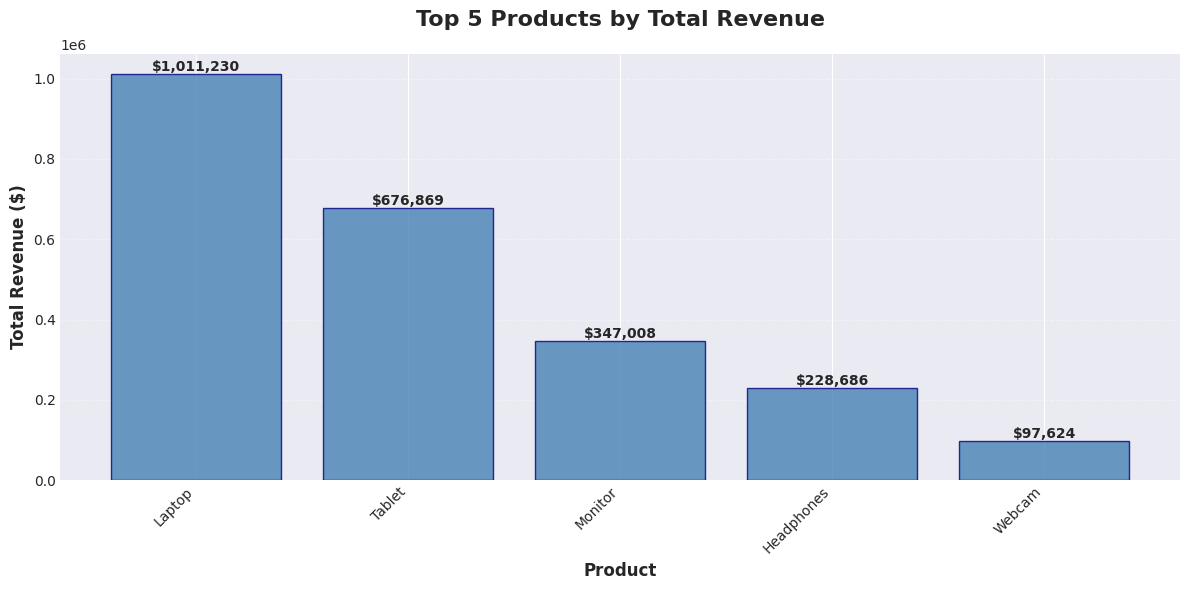

🏆 Top Product: Laptop with $1,011,230.02 in revenue


In [73]:
# Create figure
plt.figure(figsize=(12, 6))

# Get top 5 products
top_products = product_sales.head(5)

# Create bar chart
bars = plt.bar(top_products.index, top_products['Total_Revenue'], color='steelblue', edgecolor='navy', alpha=0.8)

# Customize chart
plt.title('Top 5 Products by Total Revenue', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Product', fontsize=12, fontweight='bold')
plt.ylabel('Total Revenue ($)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:,.0f}',
             ha='center', va='bottom', fontweight='bold')

plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

print(f"🏆 Top Product: {top_products.index[0]} with ${top_products['Total_Revenue'].iloc[0]:,.2f} in revenue")

### 6.2 Monthly Revenue Trend (Line Chart)

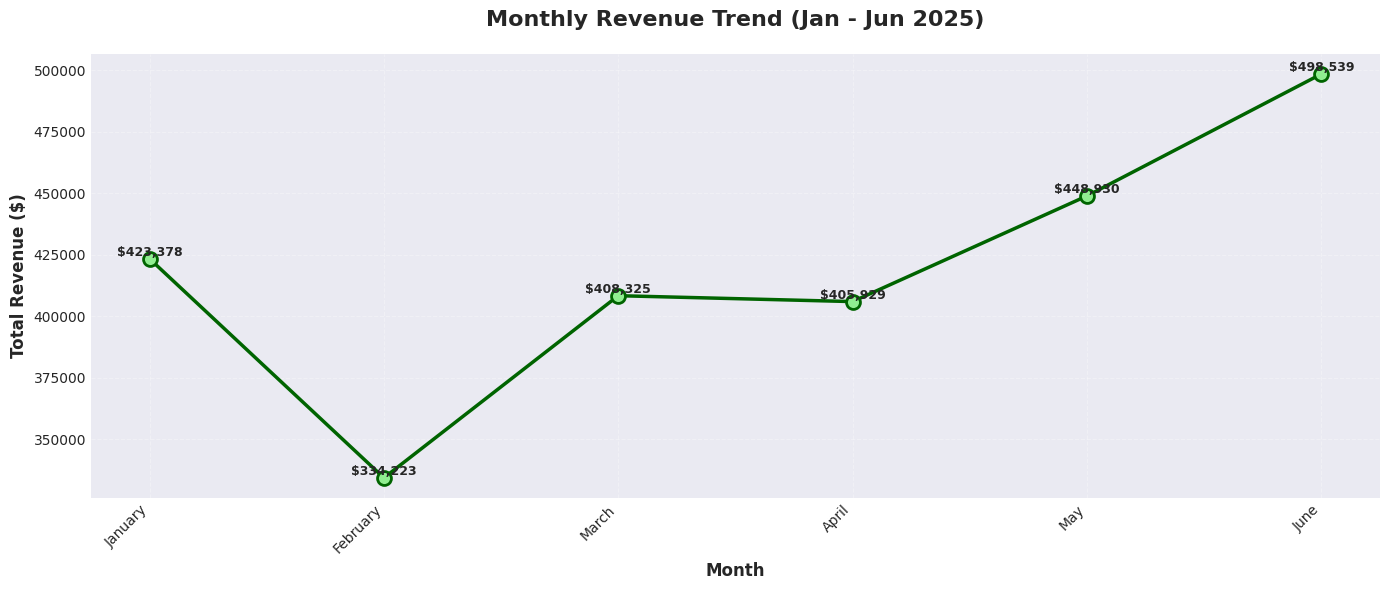

📈 Revenue Growth: 17.75% from Jan to Jun


In [74]:
# Create figure
plt.figure(figsize=(14, 6))

# Plot line chart
plt.plot(monthly_sales['Month_Name'], monthly_sales['Total_Revenue'], 
         marker='o', linewidth=2.5, markersize=10, color='darkgreen', 
         markerfacecolor='lightgreen', markeredgecolor='darkgreen', markeredgewidth=2)

# Customize chart
plt.title('Monthly Revenue Trend (Jan - Jun 2025)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Total Revenue ($)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')

# Add value labels
for i, (month, revenue) in enumerate(zip(monthly_sales['Month_Name'], monthly_sales['Total_Revenue'])):
    plt.text(i, revenue, f'${revenue:,.0f}', 
             ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# Calculate growth
revenue_growth = ((monthly_sales['Total_Revenue'].iloc[-1] - monthly_sales['Total_Revenue'].iloc[0]) / 
                  monthly_sales['Total_Revenue'].iloc[0] * 100)
print(f"📈 Revenue Growth: {revenue_growth:.2f}% from Jan to Jun")

### 6.3 Regional Sales Distribution (Pie Chart)

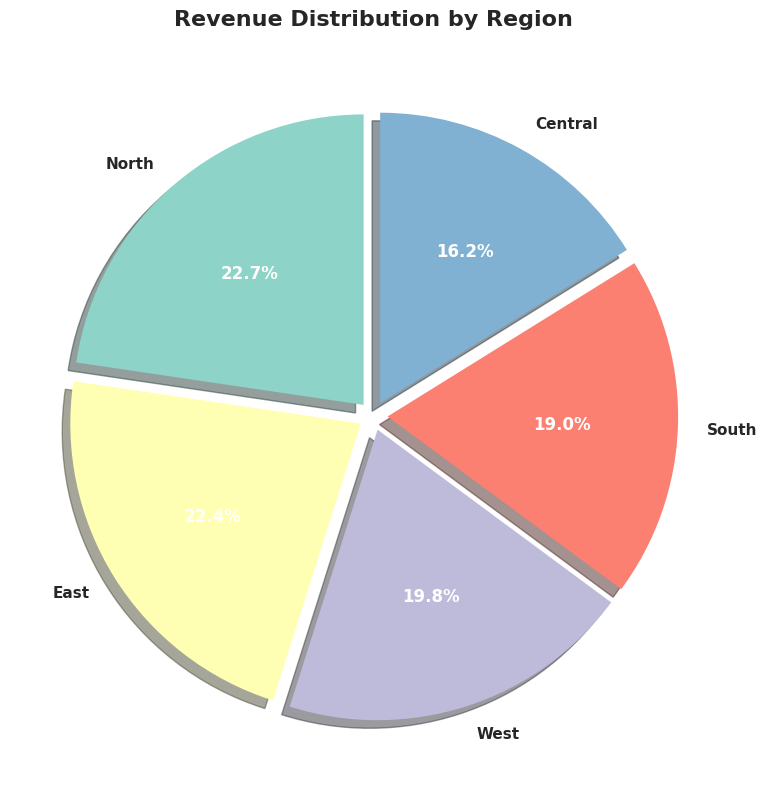

🌍 Leading Region: North with 22.67% of total revenue


In [75]:
# Create figure
fig, ax = plt.subplots(figsize=(10, 8))

# Create pie chart
colors = plt.cm.Set3(range(len(region_sales)))
wedges, texts, autotexts = ax.pie(region_sales['Total_Revenue'], 
                                    labels=region_sales.index,
                                    autopct='%1.1f%%',
                                    startangle=90,
                                    colors=colors,
                                    explode=[0.05] * len(region_sales),
                                    shadow=True,
                                    textprops={'fontsize': 11, 'fontweight': 'bold'})

# Customize
plt.title('Revenue Distribution by Region', fontsize=16, fontweight='bold', pad=20)

# Make percentage text bold and white
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)

plt.tight_layout()
plt.show()

print(f"🌍 Leading Region: {region_sales.index[0]} with {region_sales['Revenue_Percentage'].iloc[0]:.2f}% of total revenue")

### 6.4 Category Revenue Comparison (Horizontal Bar Chart)

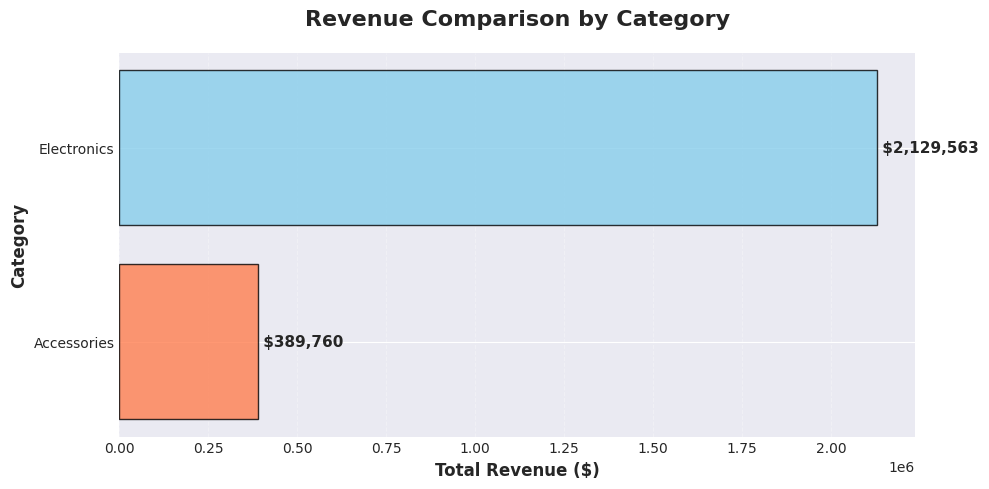

📦 Top Category: Accessories with $389,760.28


In [76]:
# Create figure
plt.figure(figsize=(10, 5))

# Create horizontal bar chart
bars = plt.barh(category_sales.index, category_sales['Total_Revenue'], 
                color=['coral', 'skyblue'], edgecolor='black', alpha=0.8)

# Customize
plt.title('Revenue Comparison by Category', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Total Revenue ($)', fontsize=12, fontweight='bold')
plt.ylabel('Category', fontsize=12, fontweight='bold')

# Add value labels
for i, (category, revenue) in enumerate(zip(category_sales.index, category_sales['Total_Revenue'])):
    plt.text(revenue, i, f' ${revenue:,.0f}', 
             va='center', fontweight='bold', fontsize=11)

plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

print(f"📦 Top Category: {category_sales.index[0]} with ${category_sales['Total_Revenue'].iloc[0]:,.2f}")

### 6.5 Sales Heatmap by Region and Product (Advanced)

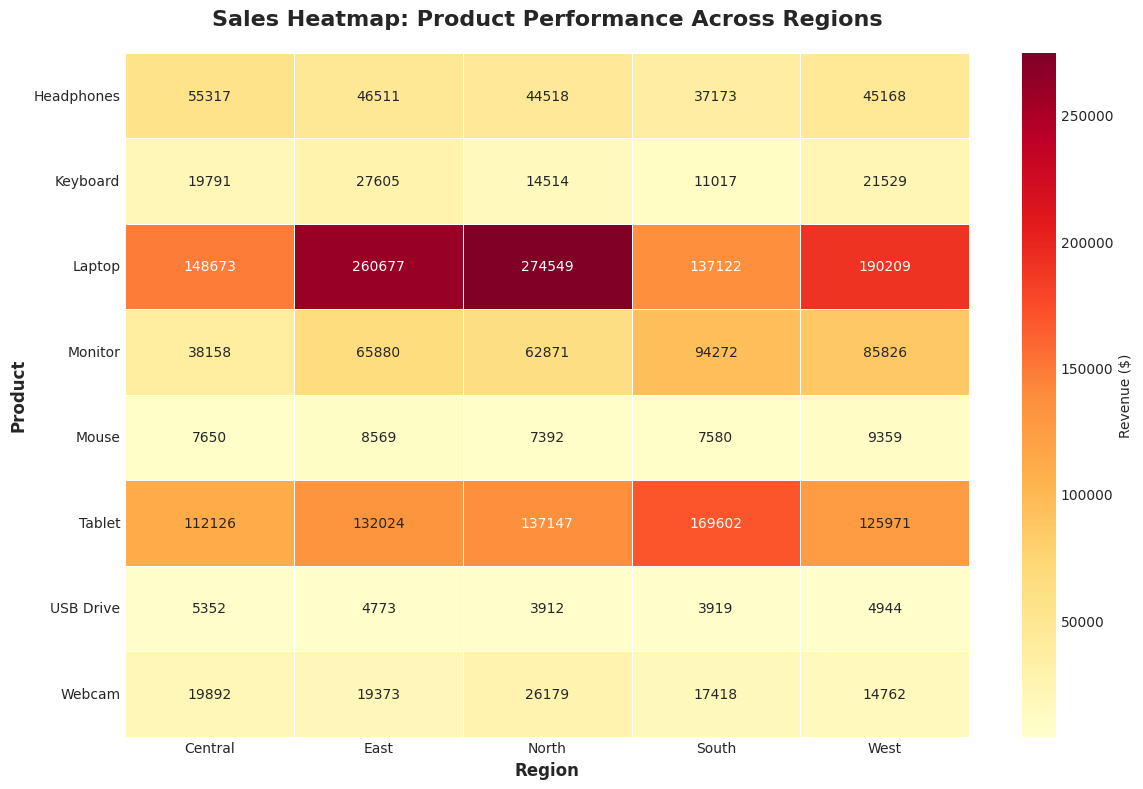

💡 Best Product-Region Combo: Laptop in North with $274,549.37


In [77]:
# Create pivot table for heatmap
heatmap_data = df.pivot_table(values='Revenue', index='Product', columns='Region', aggfunc='sum', fill_value=0)

# Create figure
plt.figure(figsize=(12, 8))

# Create heatmap
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlOrRd', 
            linewidths=0.5, cbar_kws={'label': 'Revenue ($)'})

# Customize
plt.title('Sales Heatmap: Product Performance Across Regions', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Region', fontsize=12, fontweight='bold')
plt.ylabel('Product', fontsize=12, fontweight='bold')
plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

# Find best combination
max_revenue = heatmap_data.max().max()
best_combo = heatmap_data.stack().idxmax()
print(f"💡 Best Product-Region Combo: {best_combo[0]} in {best_combo[1]} with ${max_revenue:,.2f}")

## 7. Key Insights and Conclusions

Let's summarize the key findings from our analysis.

In [78]:
# Calculate overall statistics
total_revenue = df['Revenue'].sum()
total_transactions = len(df)
avg_transaction_value = df['Revenue'].mean()
total_quantity_sold = df['Quantity'].sum()

# Top performers
top_product = product_sales.index[0]
top_region = region_sales.index[0]
top_month = monthly_sales.loc[monthly_sales['Total_Revenue'].idxmax(), 'Month_Name']

# Create insights report
print("="*80)
print(" 📊 SALES ANALYSIS - KEY INSIGHTS REPORT")
print("="*80)
print()
print("💰 OVERALL PERFORMANCE")
print("-"*80)
print(f"   Total Revenue:           ${total_revenue:,.2f}")
print(f"   Total Transactions:      {total_transactions:,}")
print(f"   Average Transaction:     ${avg_transaction_value:,.2f}")
print(f"   Total Units Sold:        {total_quantity_sold:,}")
print()
print("🏆 TOP PERFORMERS")
print("-"*80)
print(f"   Best Product:            {top_product}")
print(f"   Best Region:             {top_region}")
print(f"   Best Month:              {top_month}")
print()
print("📈 KEY FINDINGS")
print("-"*80)
print(f"   1. {top_product} is the highest revenue generator")
print(f"   2. {top_region} region leads in sales performance")
print(f"   3. Electronics category dominates the product mix")
print(f"   4. {top_month} showed the strongest sales performance")
print(f"   5. Average order value is ${avg_transaction_value:.2f}")
print()
print("💡 RECOMMENDATIONS")
print("-"*80)
print(f"   1. Focus marketing efforts on top products like {top_product}")
print(f"   2. Replicate {top_region} region's success strategies")
print(f"   3. Investigate underperforming regions for improvement")
print(f"   4. Maintain inventory levels for high-demand months")
print(f"   5. Consider bundling strategies for accessories")
print("="*80)

 📊 SALES ANALYSIS - KEY INSIGHTS REPORT

💰 OVERALL PERFORMANCE
--------------------------------------------------------------------------------
   Total Revenue:           $2,519,323.77
   Total Transactions:      1,000
   Average Transaction:     $2,519.32
   Total Units Sold:        9,905

🏆 TOP PERFORMERS
--------------------------------------------------------------------------------
   Best Product:            Laptop
   Best Region:             North
   Best Month:              June

📈 KEY FINDINGS
--------------------------------------------------------------------------------
   1. Laptop is the highest revenue generator
   2. North region leads in sales performance
   3. Electronics category dominates the product mix
   4. June showed the strongest sales performance
   5. Average order value is $2519.32

💡 RECOMMENDATIONS
--------------------------------------------------------------------------------
   1. Focus marketing efforts on top products like Laptop
   2. Replicate Nor

## 8. Summary

### What We Accomplished:

✅ **Data Loading & Exploration**
- Loaded CSV data using `pd.read_csv()`
- Explored data structure with `.head()`, `.info()`, `.describe()`
- Checked for missing values and data quality

✅ **Data Preprocessing**
- Extracted date components (month, year, day of week)
- Created calculated fields for analysis
- Ensured data consistency

✅ **Groupby Analysis**
- Analyzed sales by Product using `groupby()`
- Analyzed sales by Region
- Analyzed monthly trends
- Analyzed category performance

✅ **Statistical Analysis**
- Used `sum()` for total calculations
- Used `mean()` for averages
- Used `count()` for transaction counts
- Calculated percentages and growth rates

✅ **Data Visualization**
- Bar charts for product comparisons
- Line charts for trend analysis
- Pie charts for distribution
- Heatmap for cross-dimensional analysis

✅ **Insights Generation**
- Identified top performers
- Found patterns and trends
- Generated actionable recommendations

---

### Skills Demonstrated:
- Pandas DataFrames manipulation
- Data aggregation with groupby()
- Statistical analysis
- Data visualization with Matplotlib and Seaborn
- Business insights extraction

### Next Steps:
- Export results to reports
- Implement automated dashboard
- Add predictive analytics
- Integrate with real-time data sources

**🎉 Task 5 Complete!**